# Assignment 1
## Chosen data set: Solar Radiation from Agrimet; 2000 through 2017
I have chosen to analyze the last 17 years of local solar radiation data in the Lower Boise River Basin. In order to understand the data and associated trends, I used plots and statistical analysis, including basic statistics (mean, variance, etc.), histograms, and linear/lag regression models.
The solar radiation data shows a clear sinusodal pattern/trend on a yearly cycle, with a slight variation in year to year averages through the 17 years in the data set. The statistical analysis indicates the data set is stationary, meaning the values are not time dependant structures. This is correlated in simply observing the data plotted against a linear trend line- meaning the linear slope equation does not have a high probability of predicting a value at any given time.
The results coincide with the intuitive perception of seasonality and the control that orbital cycles have on insolation angles and radiation energy per square meter as we record it on the Earth's surface.

### 1) Import it and create a plot
This code imports the .csv file created from the downloaded Agrimet data. The data file has been tailored to the import by organzing general/number column formats and their appropriate titles. The import is done by using Pandas. This will load the .csv to a dataframe which is then used to create arrays of data.


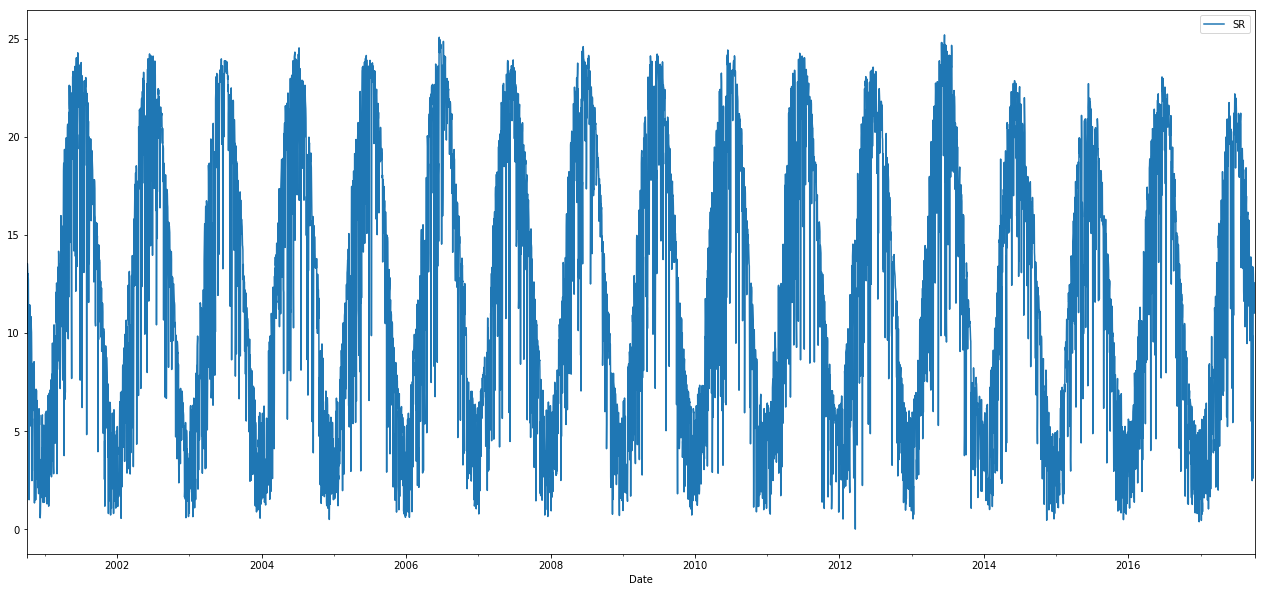

In [66]:
# Import list for functions used in body
import pandas as pd # used for handling dataframes of data
import numpy as np # used for arrays and mathematical computation
import matplotlib.pyplot as plt # used to make beautiful plots as if they came from the mighty matlab
import statsmodels.tsa.api as sm # used to generated statistics on data values using models
from scipy import stats # used to generate specific statistics on a few sections
from scipy.stats import linregress # used to generate specific statistics on a few sections
from statsmodels.tsa.stattools import adfuller # used to generate specific statistics on a few sections

# Import .csv of daily average solar radiation values using pandas dataframe; naming columns and then skipping header row
df = pd.read_csv('BOII_SR_2000to2017.csv', names=['Year','Month','Day','SR'], skiprows=1)
# Modify the date information for better plotting by creating a new serial date column
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.Day,format='%Y%m%d')
# Create an array of just solar radiation values
SR = df['SR'].values
Date = df['Date'].values
# Plot the imported data
df.plot(x='Date', y='SR',kind='line',figsize=(22,10))
plt.show()

## 2) Compute and show key descriptive statistics about the time series that might include the mean, variance, and/or histograms
Numpy and Pandas functions are used to calculate basic statistics on the data set to get an idea of its characteristics.
The histogram shows either a bimodal or plateau shaping. This is indicative of the time trending the values within the sinusoidal shape.

In [3]:
# Daily average mean within the solar radaiation values using numpy mean
SRmean = np.mean(SR)
print ('Daily Solar Radiation mean value is: %.2f MJ/m^2/d' % float(SRmean)) # Still need to figure out superscripts

Daily Solar Radiation mean value is: 12.15 MJ/m^2/d


In [4]:
# Daily average variance within the solar radaiation values using numpy variance
SRVari = np.var(SR)
print ('Daily Solar Radiation variance(whole population) is: %.2f MJ/m^2/d' % float(SRVari)) # Still need to figure out superscripts

Daily Solar Radiation variance(whole population) is: 48.97 MJ/m^2/d


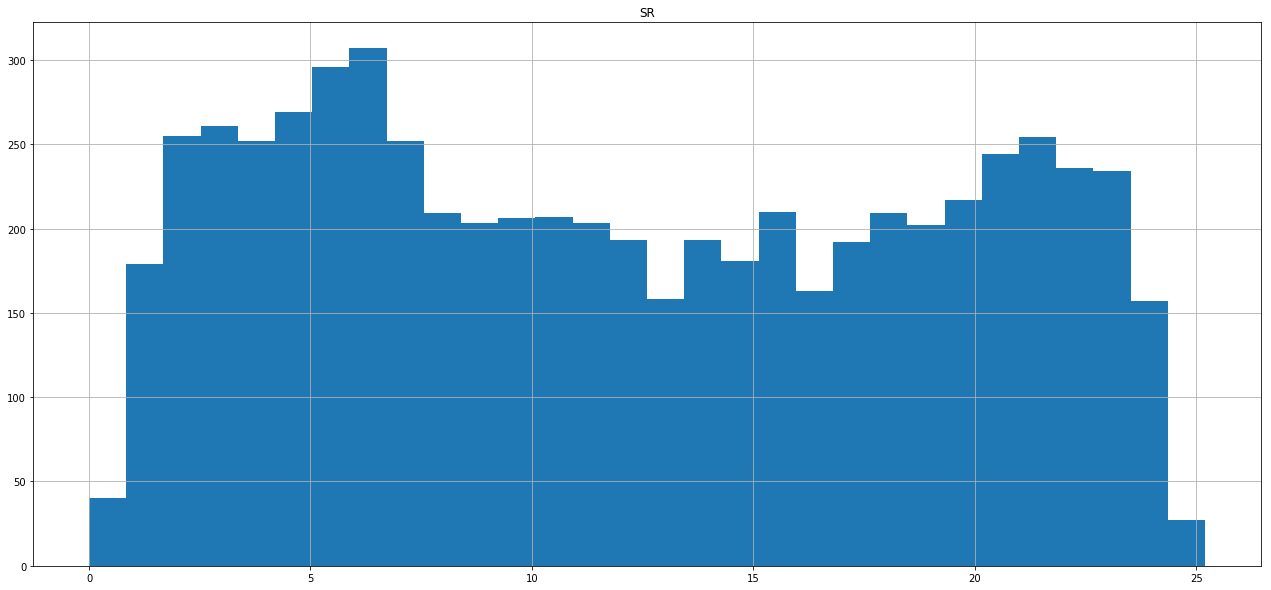

In [5]:
# Histogram plot of solar radiation values
df.hist('SR', figsize=(22,10), bins=30)
plt.show()

## 3) Assess the stationarity of the time series in one or both of the following ways:
    a) Compute and report the slope of a regression line through time 
    (and it's significance)
    b) Compute and report the Augmented Dickey-Fuller test
Additional comments can be found in the last section.

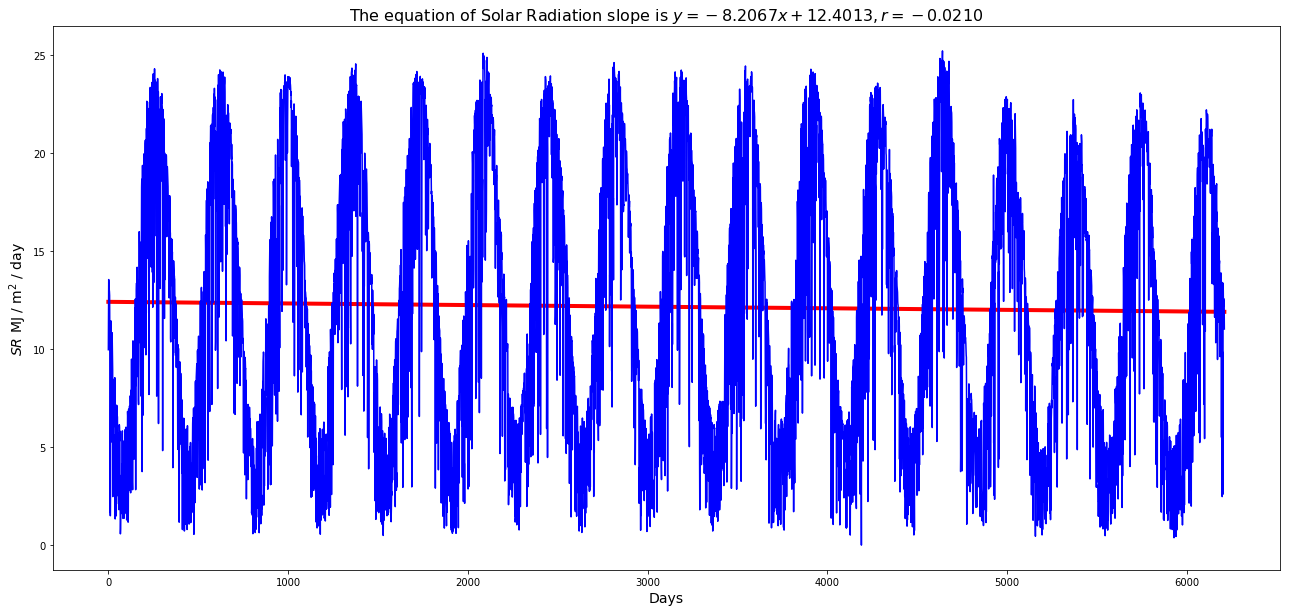

In [65]:
# Linear Regression line, plot, and equation
xi = np.arange(len(Date)) # set range
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,df['SR']) # calculates variables based on imput range and values
line1 = intercept + slope*xi # equation for regression line (y=mx+b)
plt.figure(1,figsize=(22,10)) # set figure dimenions before plot
plt.plot(line1,'r-',linewidth=4)
plt.plot(xi,SR,'b-')
plt.title('The equation of Solar Radiation slope is $y=%3.7sx+%3.7s,r=%2.7s$'%(slope, intercept, r_value),fontsize=16)
plt.xlabel('Days',fontsize=14)
plt.ylabel('$SR$ MJ / m$^2$ / day',fontsize=14)
plt.show()

In [36]:
# Augmented Dickey-Fuller test (for stationarity)
series = pd.Series(df['SR']) # turn solar radiation values into a series
X = series.values # turn the series data to values
result = adfuller(X) # plug in the series values to the built in ADF function
print('ADF Statistic: %f' % result[0]) # print the ADF num; more negative means more likely to reject null hypothesis
print('p-value: %f' % result[1]) # <=.05 means no root; or IS stationary
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value)) # range of values to compare against the ADF stat

ADF Statistic: -4.959680
p-value: 0.000027
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### 4) Compute and plot the autocorrelation function of the time series. 
The solar radiation data shows a clear sinusodal trend/variation on a yearly basis. If you only sample a piece of one year, or any kind of sampling not along the same time boundary for each year (if that makes sense), the data will be largely misrepresented and could produce extreme positive or negative trending; unless your sample is less than ~30 days and lies within the same season of the year.

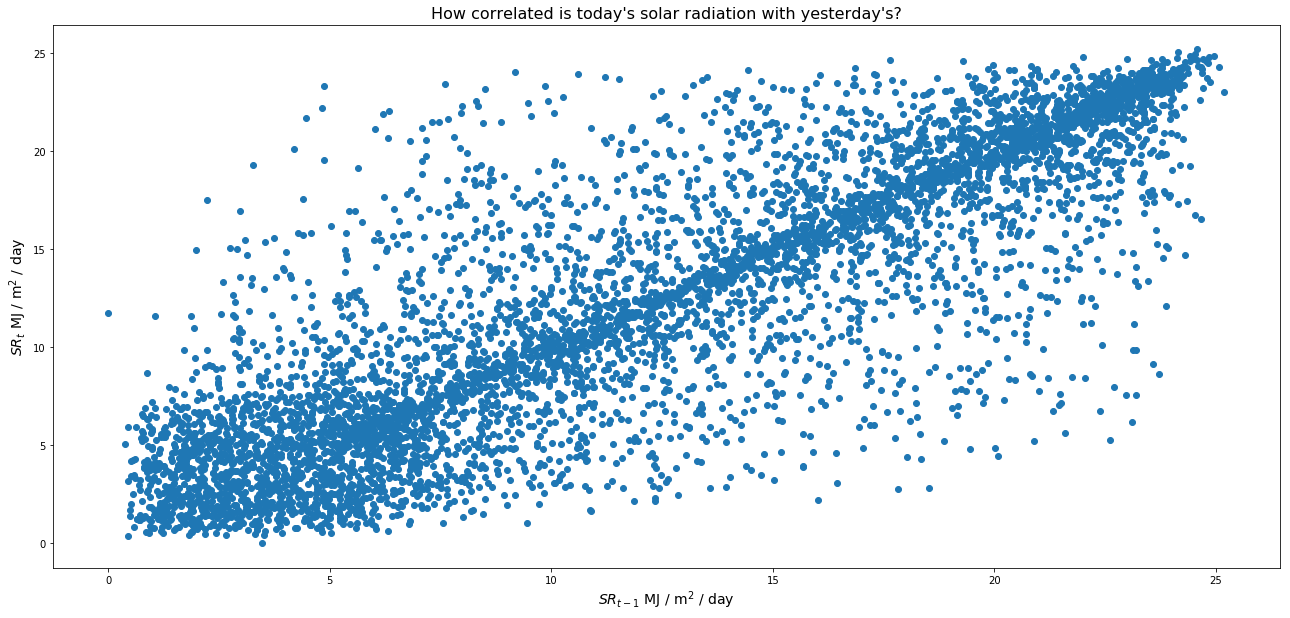

0.85302164884076925

In [70]:
# Correlation with previous day

# Use numpy array indexing to get solar radiation from October 2, 2000 to September 30, 2017. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
SRt   = SR[1:-1] 

# Similarly get solar radiation from October 1, 2000 to September 29, 2017 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
SRtm1 = SR[0:-2]

# Use Matplotlib to create a scatter plot of the two time series, with a title and labeled axes
plt.figure(figsize=(22,10))
plt.plot(SRtm1,SRt,'o')
plt.title('How correlated is today\'s solar radiation with yesterday\'s?',fontsize=16)
plt.xlabel('$SR_{t-1}$ MJ / m$^2$ / day',fontsize=14)
plt.ylabel('$SR_t$ MJ / m$^2$ / day',fontsize=14)
plt.show()
# how correlated is this? 1=max
R = np.corrcoef(SRtm1,SRt)
R[1,0]

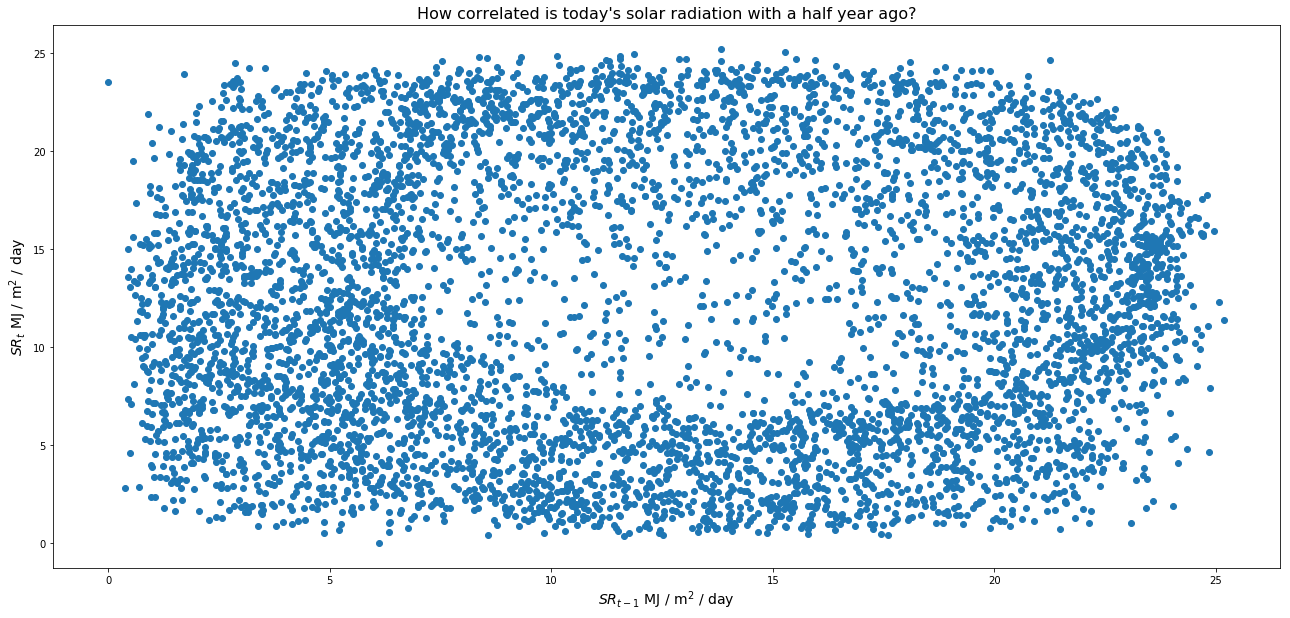

0.023377729440713115

In [69]:
# How correlated is it from 90 days ago?
SRt   = SR[90:-1] 
SRtmk = SR[0:-(91)]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(22,10))
plt.plot(SRtmk,SRt,'o')
plt.title('How correlated is today\'s solar radiation with a half year ago?',fontsize=16)
plt.xlabel('$SR_{t-1}$ MJ / m$^2$ / day',fontsize=14)
plt.ylabel('$SR_t$ MJ / m$^2$ / day',fontsize=14)
plt.show()
# how correlated is this? 1=max
R = np.corrcoef(SRtmk,SRt)
R[1,0]

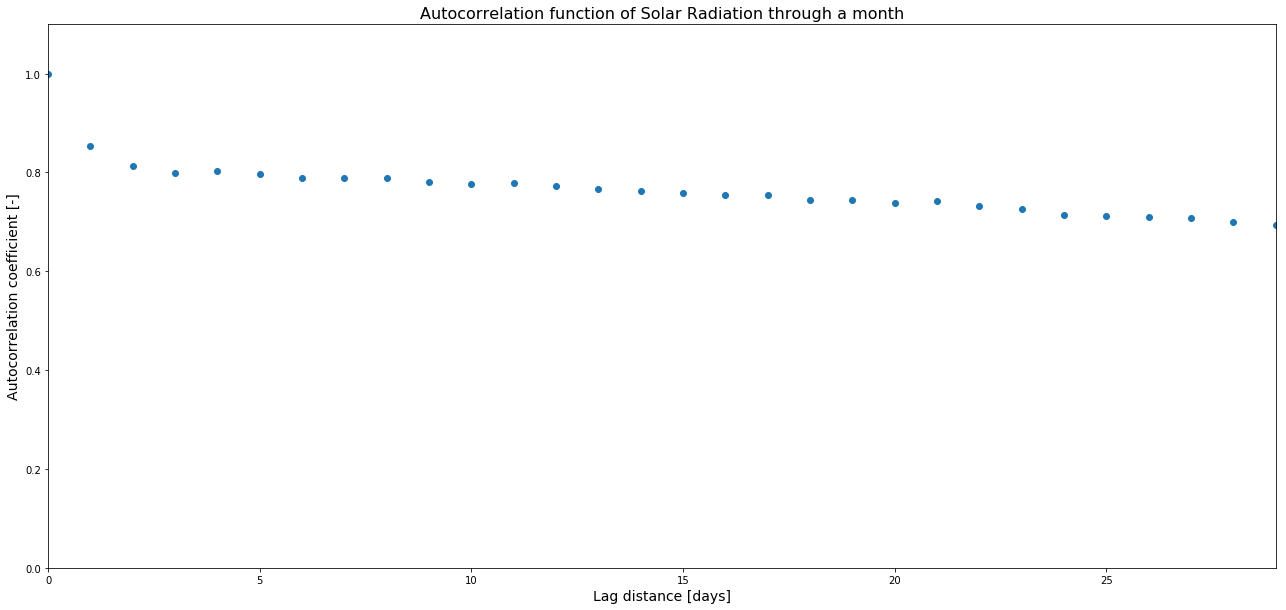

In [68]:
# Autocorrelation lag for a month

Nk = 30 # set lag time
K  = np.arange(0,Nk,1) # set range to lag time with time step 1
Rk = np.zeros((Nk,1)) # preallocate empty array

# loop to see correlation of day to previus day through the total lag time
for k in K:
    SRt   = SR[k:-1] 
    SRtmk = SR[0:-(1+k)]
    R = np.corrcoef(SRtmk,SRt)
    Rk[k] = R[1,0]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(22,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Solar Radiation through a month',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=14)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=14)
plt.show()

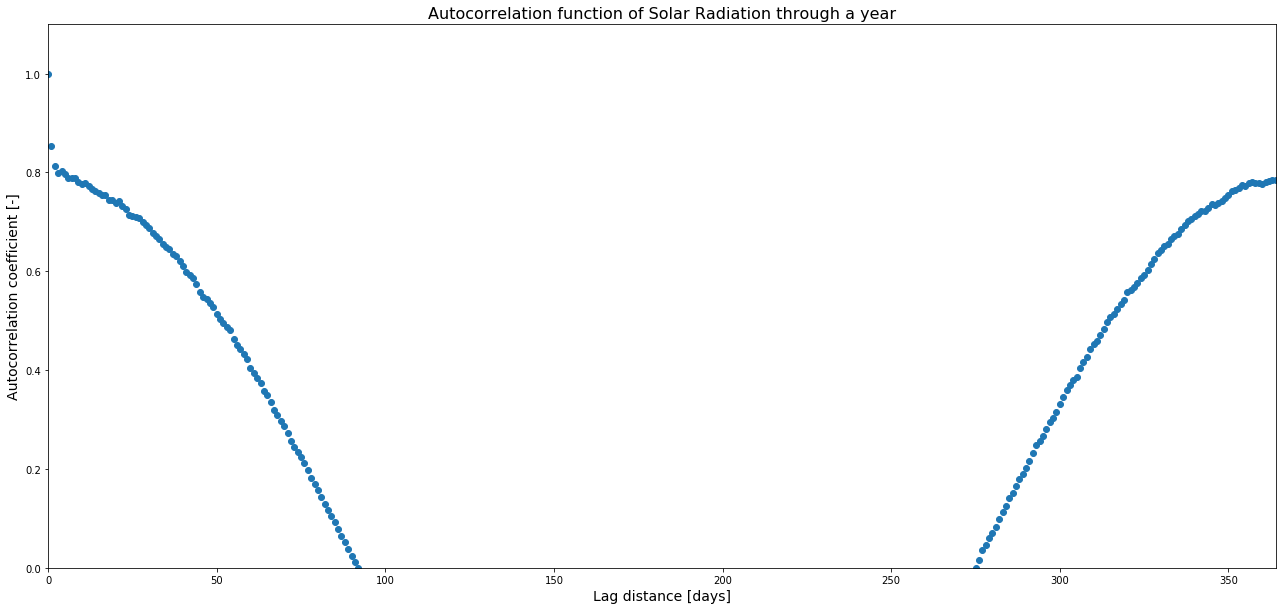

In [67]:
# Autocorrelation lag for a year

Nk = 365 # set lag time
K  = np.arange(0,Nk,1) # set range to lag time with time step 1
Rk = np.zeros((Nk,1)) # preallocate empty array

# loop to see correlation of day to previus day through the total lag time
for k in K:
    SRt   = SR[k:-1] 
    SRtmk = SR[0:-(1+k)]
    R = np.corrcoef(SRtmk,SRt)
    Rk[k] = R[1,0]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(22,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Solar Radiation through a year',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=14)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=14)
plt.show()

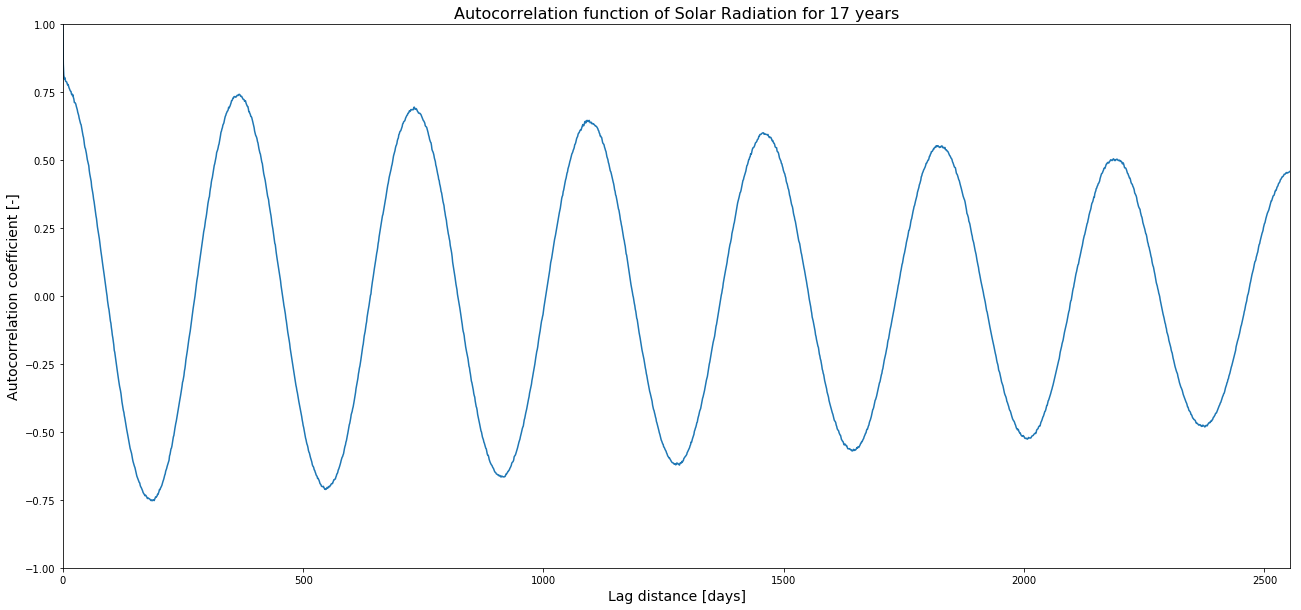

In [59]:
# Now for the correlation from the last 17 years
SRp = SR - np.mean(SR) # difference off mean
autocovs2 = np.correlate(SRp, SRp, mode='full') # cross-correlation of SR values from mean
N = autocovs2.size # number of elements
autocovs2_oneside = autocovs2[N//2:] # splitting elements in two 
autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0] # correlations through elements
Nk2 = 365*7
K2 = np.arange(0,Nk2,1)

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(22,10))
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-')
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of Solar Radiation for 17 years',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=14)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=14)
plt.show()

### Discuss in detail the results of your analyses in terms of the physical reasons that you observe the trends you see. For example, can you explain why the autocorrelation function behaves as you observe it to based on physical intuition?
The regression plot shows a clear sinusoidal pattern of yearly solar radiation values, with an equation indicating a slightly negative average trend over the 17 year sample. The r-value is an indication that the linear slope is not a good indication of an average value at a specific time. An analysis of a polynomial trend of a higher degree may prove more effective at producing an average value at any given time.
The Augmented Dickey-Fuller test shows the data features a p-value of 0.000027, which suggests the time series does not have a unit root, meaning it is stationary. The test also showed a statistical(ADF) value of almost -5%. With an ADF value of -4.9%, and a 1% critical value of -3.4%, we can reject the null hypothesis (being non-stationary) with a significance level of less than 1% and assume a low probability that the result is an anomaly.
My analysis of Solar Radiation observed in the Lower Boise River Basin shows a strong correlation (r=.85) from day to day values. However, the correlation drops quickly as you approach >30 days (r=.02 at 90 days). This is to be expected as the daily mean insolation of the valley is controlled through orbital cycles, and to a lesser extent, atmoshperic interference. This is further correlated through observing the lag trends through 30, 90, 180, and 365 days. The trends fit the intuition that radiation values decrease and increase as tilt/seasonality changes throughout the year.